Junaid Iqbal Khan
**2021317105**

In [ ]:
import math
import cv2
import random 
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dataset
from sklearn import svm

In [ ]:
mnist = dataset.fetch_openml('mnist_784')
mnist_data = mnist.data
mnist_target = mnist.target

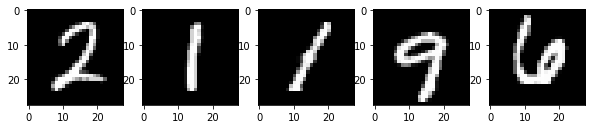

In [ ]:

fig = plt.figure(figsize=[10, 2])
ax = []
random_id = np.random.choice(mnist_data.shape[0],5)
for i in range(5):  
  ax.append(fig.add_subplot(1,5,i+1))
  ax[i].imshow(mnist_data[random_id[i]].reshape(28,28),cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
def randomizer(X,Y,extract):
  samples = X.shape[0]
  index = np.random.choice(samples,samples,replace=False) 
  X_rand = X[index]
  Y_rand = Y[index]
  X=X_rand[0:extract]
  Y=Y_rand[0:extract]
  return X,Y

X,Y = randomizer(mnist_data,mnist_target,10000)

In [ ]:
print("Original Data Sample Size: ");
print(mnist_data.shape[0])
print("Extracted Data Sample Size: ");
print(X.shape[0])

Original Data Sample Size: 
70000
Extracted Data Sample Size: 
10000


In [ ]:
def splitter(X,Y,splitting_ratio):
  num_data = int(X.shape[0]*(1-splitting_ratio))
  x_train = X[:num_data]
  x_test = X[num_data:]
  y_train = Y[:num_data]
  y_test = Y[num_data:]
  return x_train,x_test,y_train,y_test


X_train,X_test,Y_train,Y_test=splitter(X,Y,0.3)

In [ ]:
print("Training Data Sample Size: ");
print(X_train.shape[0])
print("Testing Data Sample Size: ");
print(X_test.shape[0])

Training Data Sample Size: 
7000
Testing Data Sample Size: 
3000


In [ ]:
## For binary classification, we adopt to either some sample represents '1' or not
def binarizer(Y_train,Y_test):
  Y_train_new=np.zeros(Y_train.shape[0])
  Y_test_new=np.zeros(Y_test.shape[0])

  for i in range(Y_train.shape[0]):
    if (Y_train[i]=='1'):
      Y_train_new[i]=1
    else:
      Y_train_new[i]=0


  for i in range(Y_test.shape[0]):
    if (Y_test[i]=='1'):
      Y_test_new[i]=1
    else:
      Y_test_new[i]=0

  return Y_train_new,Y_test_new

Y_train_new,Y_test_new=binarizer(Y_train,Y_test)


In [ ]:
model= svm.SVC()
train_accuracy=model.fit(X_train, Y_train_new).score(X_train, Y_train_new)
print("Training accuracy: ")
print(train_accuracy)

Training accuracy: 
0.998


In [ ]:
Y_pred=model.predict(X_test)


def accuracer(Y_test,Y_pred):
  sum=0
  for i in range(Y_test.shape[0]):
    # instead of using indicator function, an analytical form is used which would give roughly same result
    sum=sum+np.exp(-1*(Y_test[i].astype(np.float32)-Y_pred[i])**2)

  acc=sum/Y_test.shape[0]
  return acc

print("Testing Accuracy: ");
print(accuracer(Y_test_new,Y_pred))


Testing Accuracy: 
0.9962072766470281


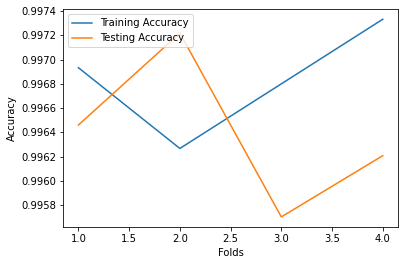

In [ ]:
#cross validating in context of whether a digit is '1' or not
def Kfoldcrossvalidator(data,target,k=4):
  X,Y_old=randomizer(data,target,10000)
  Y=np.zeros(Y_old.shape[0])

  for i in range(Y_old.shape[0]):
    if (Y_old[i]=='1'):
      Y[i]=1
    else:
      Y[i]=0

  
  train_acc=[]
  test_acc=[]
  for i in range(k):
    cut = int(X.shape[0]/k)
    x_test = X[i*cut:cut*(i+1)]
    y_test = Y[i*cut:cut*(i+1)]
    x_train = np.delete(X,np.arange(i*cut,cut*(i+1),1),axis=0)
    y_train = np.delete(Y,np.arange(i*cut,cut*(i+1),1),axis=0)

    model= svm.SVC()
    train_acc.append(model.fit(x_train, y_train).score(x_train, y_train))

    y_pred=model.predict(x_test)
    test_acc.append(accuracer(y_test,y_pred))

  return train_acc,test_acc


k=4
train_accuracy,test_accuracy=Kfoldcrossvalidator(mnist_data,mnist_target,k)
K= list(range(1,k+1))
plt.plot(K,train_accuracy, label="Training Accuracy")
plt.plot(K,test_accuracy,label="Testing Accuracy")
plt.legend(loc="upper left")
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()